In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime

In [2]:
cabs_ride_df = pd.read_csv('Resources/Kaggle_Data/cab_rides.csv')
cabs_ride_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [3]:
cabs_ride_df['Time Stamp'] = pd.to_datetime(cabs_ride_df['time_stamp']/1000, unit = 's')
cabs_ride_df['Day of Week'] = cabs_ride_df['Time Stamp'].dt.dayofweek

In [4]:
cabs_ride_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Time Stamp,Day of Week
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,6
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,1
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954,2
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050,3
...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.533999919,5
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.533999919,5
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.533999919,5
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.533999919,5


In [5]:
cleaned_cab_df = cabs_ride_df[['distance', 'cab_type', 'destination', 'source', 'price', 'Day of Week']]

cleaned_cab_df = cleaned_cab_df.rename(columns = {'distance': 'Distance',
                                                  'cab_type': 'Company',
                                            
                                                  'destination': 'Destination',
                                                  'source': 'Source',
                                                  'price': 'Price'})
cleaned_cab_df

,Distance,Company,Destination,Source,Price,Day of Week
0,0.44,Lyft,North Station,Haymarket Square,5.0,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,3
...,...,...,...,...,...,...
693066,1.00,Uber,North End,West End,13.0,5
693067,1.00,Uber,North End,West End,9.5,5
693068,1.00,Uber,North End,West End,NaN,5
693069,1.00,Uber,North End,West End,27.0,5


In [6]:
cleaned_cab_df = cleaned_cab_df.dropna(how='any')
cleaned_cab_df

,Distance,Company,Destination,Source,Price,Day of Week
0,0.44,Lyft,North Station,Haymarket Square,5.0,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,3
...,...,...,...,...,...,...
693065,1.00,Uber,North End,West End,9.5,5
693066,1.00,Uber,North End,West End,13.0,5
693067,1.00,Uber,North End,West End,9.5,5
693069,1.00,Uber,North End,West End,27.0,5


In [7]:
uber_df = cleaned_cab_df.loc[cleaned_cab_df["Company"] == "Uber", :]
uber_df

,Distance,Company,Destination,Source,Price,Day of Week
12,1.11,Uber,West End,North End,12.0,4
13,1.11,Uber,West End,North End,16.0,3
14,1.11,Uber,West End,North End,7.5,3
15,1.11,Uber,West End,North End,7.5,6
16,1.11,Uber,West End,North End,26.0,4
...,...,...,...,...,...,...
693065,1.00,Uber,North End,West End,9.5,5
693066,1.00,Uber,North End,West End,13.0,5
693067,1.00,Uber,North End,West End,9.5,5
693069,1.00,Uber,North End,West End,27.0,5


In [50]:
uber_stat = uber_df.groupby(['Day of Week'])
uber_sum = uber_stat.sum()
uber_sum

,Distance,Price
Day of Week,,
0,129674.70,935232.5
1,131220.89,947942.0
2,76776.83,552997.5
3,103691.35,746643.5
4,93345.78,672069.5
5,93244.95,676202.0
6,96447.75,690348.0


In [9]:
lyft_df = cleaned_cab_df.loc[cleaned_cab_df["Company"] == "Lyft", :]
lyft_df

,Distance,Company,Destination,Source,Price,Day of Week
0,0.44,Lyft,North Station,Haymarket Square,5.0,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,3
...,...,...,...,...,...,...
693042,3.11,Lyft,Fenway,Theatre District,16.5,3
693043,3.11,Lyft,Fenway,Theatre District,22.5,3
693048,3.11,Lyft,Fenway,Theatre District,7.0,3
693051,3.11,Lyft,Fenway,Theatre District,10.5,3


In [10]:
lyft_counts = lyft_df["Distance"].value_counts()
lyft_counts

1.07    2916
1.06    2916
1.73    2904
1.72    2766
1.08    2556
        ... 
4.85       6
5.10       6
4.90       6
6.33       6
6.14       6
Name: Distance, Length: 513, dtype: int64

In [19]:
lyft_stat = lyft_df.groupby(['Day of Week'])
sum_lyft = lyft_stat.sum()
sum_lyft

,Distance,Price
Day of Week,,
0,119547.13,948905.35
1,120960.18,961468.80
2,71530.03,568172.20
3,95396.44,756950.43
4,87965.81,694668.70
5,87838.12,699022.00
6,89056.08,704770.50


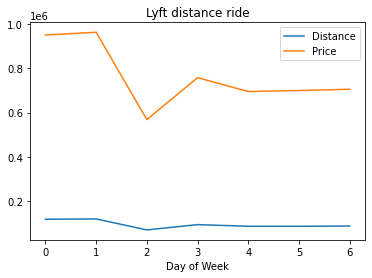

In [24]:
sum_lyft.plot(kind="line")
plt.title("Lyft distance ride")
plt.xlabel("Distance")
plt.xlabel("Day of Week")
figsize = 20.1

In [28]:
minimun_price = cleaned_cab_df.groupby('Distance').min()['Price']
maximum_price = cleaned_cab_df.groupby('Distance').max()['Price']
#median_price = cleaned_cab_df.groupby('Distance').median()['Price']

statistics_df = pd.DataFrame({"Max Price": maximum_price,
                           "Min Price": minimun_price
                            
                           })

statistics_df

,Max Price,Min Price
Distance,,
0.02,27.5,5.5
0.03,27.5,4.5
0.04,27.5,7.0
0.12,27.5,7.0
0.17,27.0,4.5
...,...,...
7.45,46.0,12.0
7.46,89.5,11.0
7.50,56.0,13.0
